In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

Задание 1 (Алгоритм разрастания регионов)

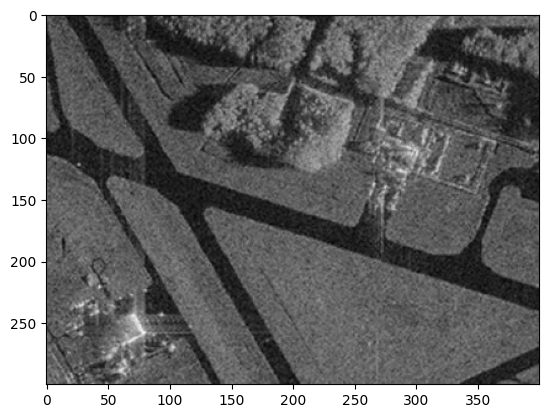

In [24]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

In [25]:
import math
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False

In [26]:
def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask
        
    return mask*255

90
295
481
699
867
939
1139
1159
1014
973
949
840
1139
717
653
616
548
505
441
380
293
285
244
135
5
0


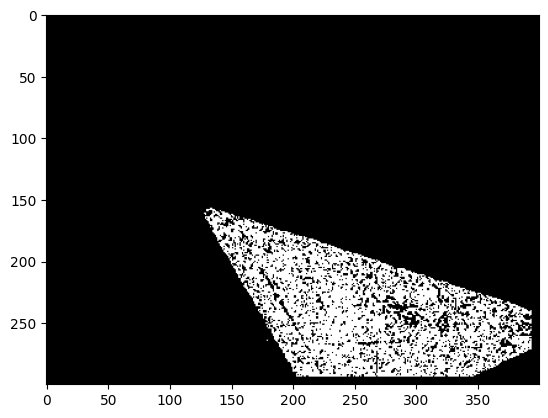

In [27]:
seed_point = (250, 250)
mask = region_growing(image_gray, seed_point, homo_average, 6, 10)
plt.imshow(mask, cmap="gray")

Алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев

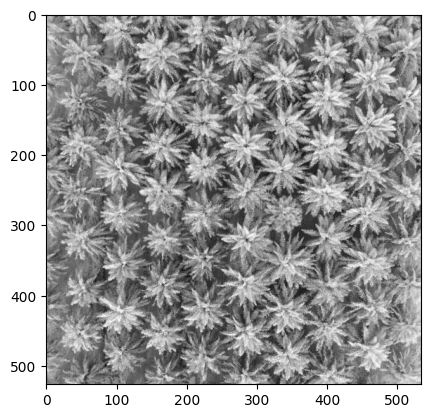

In [28]:
image = cv2.imread("palm_1.JPG")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = "gray")

In [29]:
blurred = cv2.GaussianBlur(image_gray, (13, 13), 0)
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

Text(0.5, 1.0, 'Бинаризация')

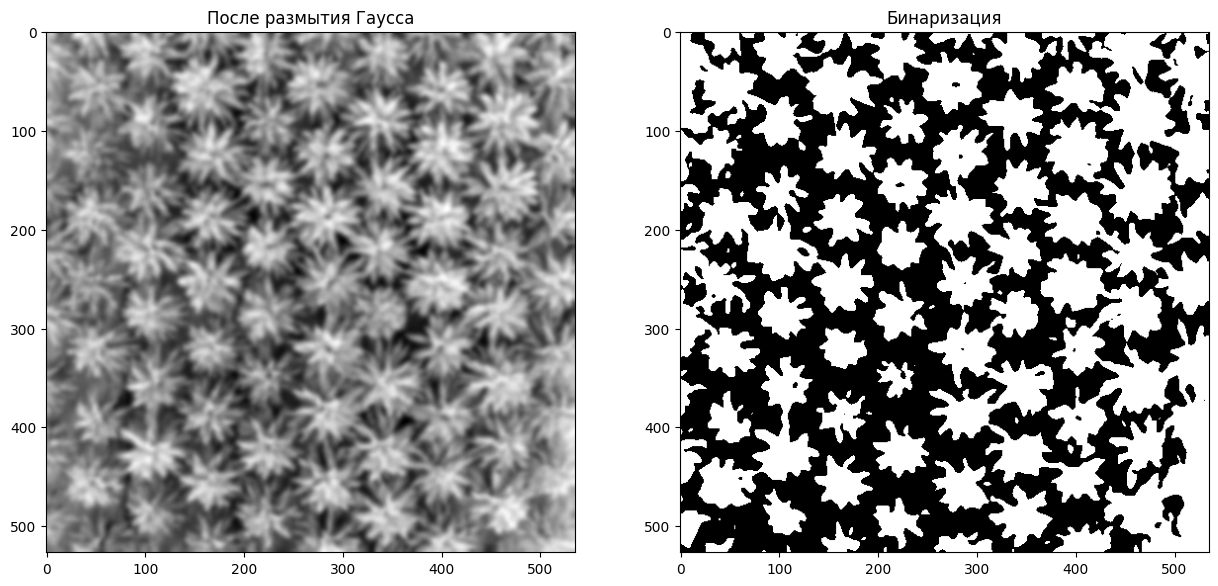

In [30]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(blurred, cmap='gray')
plt.title('После размытия Гаусса')

plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Бинаризация')

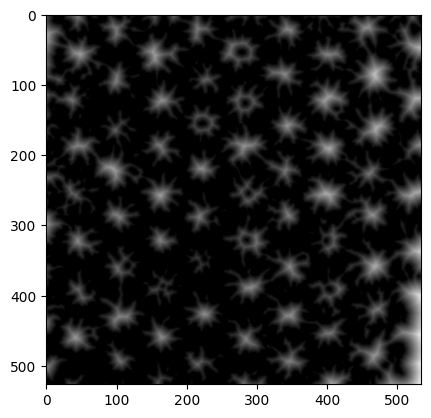

In [31]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5) 
plt.imshow(dist, cmap="gray")

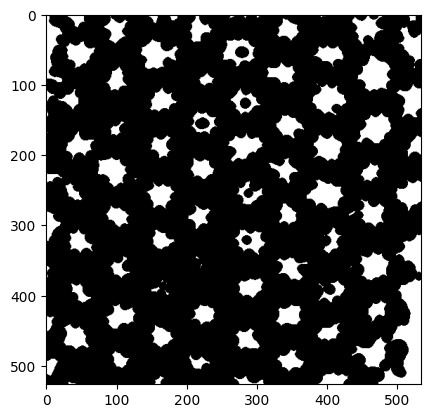

In [32]:
ret, sure_fg = cv2.threshold(dist, 0.2 * dist.max(), 255, cv2.THRESH_BINARY) 
plt.imshow(sure_fg, cmap="gray")

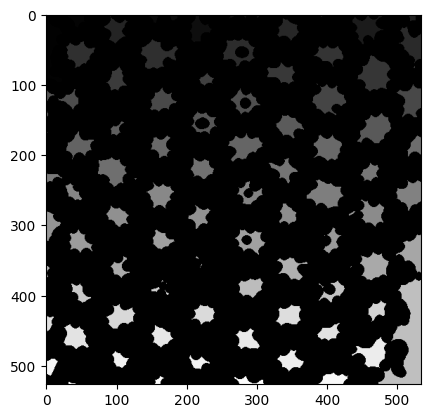

In [33]:
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg) 
plt.imshow(markers, cmap="gray")

In [34]:
res_image = image.copy()
markers = cv2.watershed(res_image, markers.astype(np.int32)) 

# отрисовка границ пальм 
res_image[markers == -1] = [0, 0, 255]  

# подсчет деревьев
palm_count = len(np.unique(markers)) - 1

Text(0.5, 1.0, 'Разбиение')

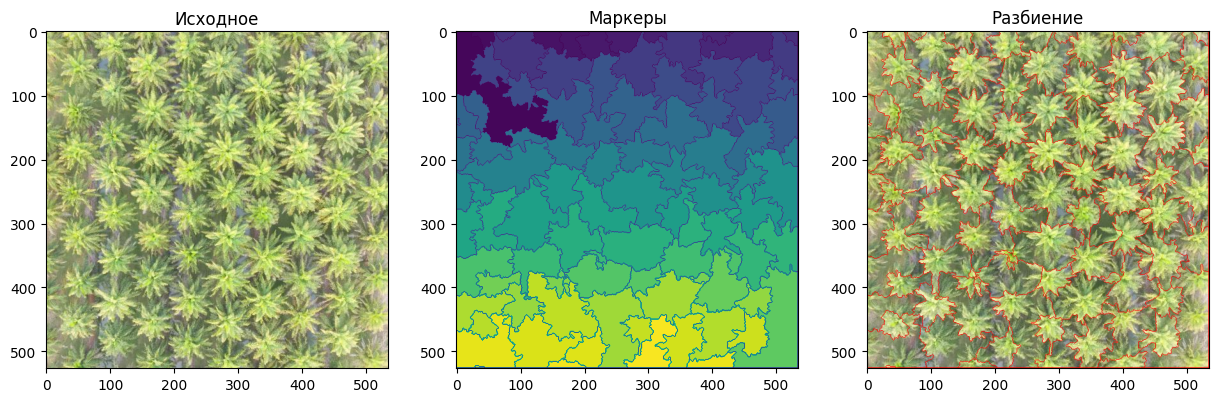

In [35]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Исходное")

plt.subplot(1,3,2)
plt.imshow(markers)
plt.title("Маркеры")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(res_image, cv2.COLOR_BGR2RGB))
plt.title("Разбиение")

In [36]:
print(f"Количество пальмовых деревьев: {palm_count}")

Количество пальмовых деревьев: 100


Вычисление критерия однородности, отличного от представленного. Сравнение результатов.

In [37]:
def apply_kmeans(image, K):
    z = image.reshape((-1, 1))  
    z = np.float32(z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((image.shape))
    return res2

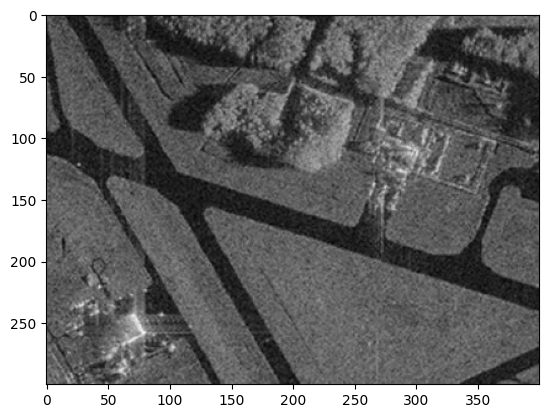

In [38]:
image = cv2.imread("sar_1.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

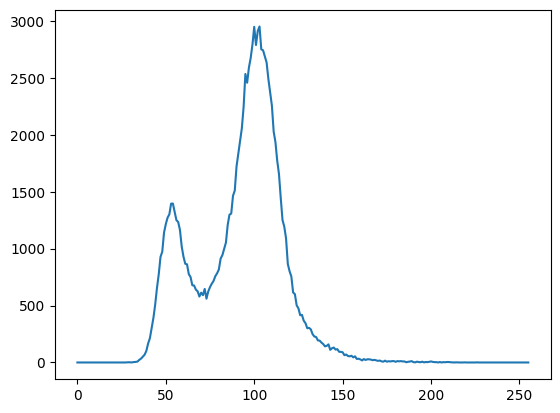

In [39]:
def make_hist(image):
    histSize = 256
    histRange = (0, 256)
    accumulate = False
    return cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)

hist = make_hist(image_gray)
plt.plot(hist)

In [40]:
k2_result = apply_kmeans(image_gray, 2)
k3_result = apply_kmeans(image_gray, 3)
k4_result = apply_kmeans(image_gray, 4)

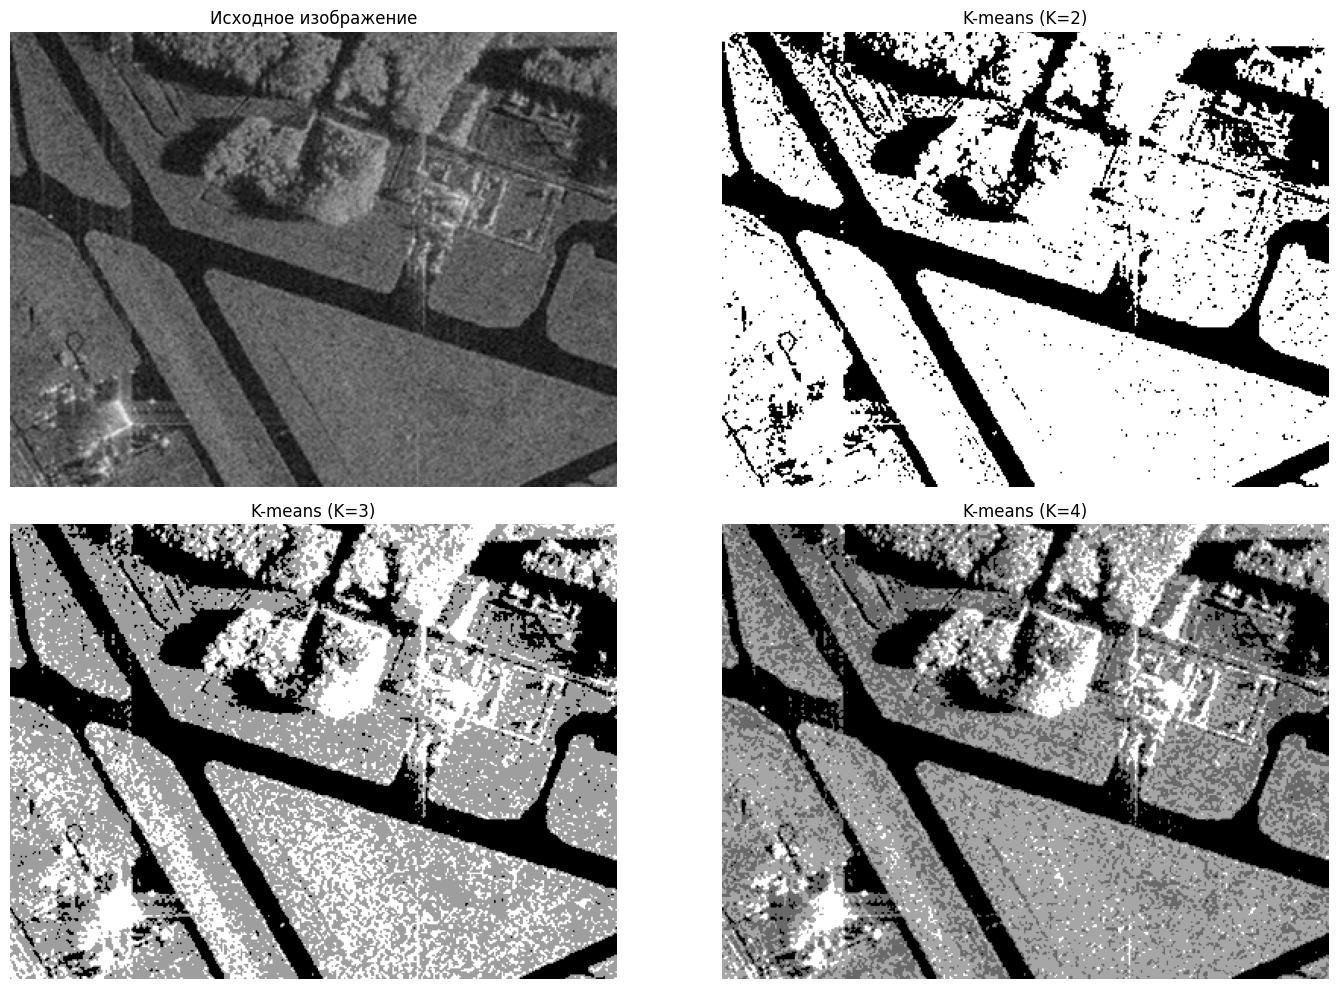

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title('Исходное изображение')
axes[0, 0].axis('off')

axes[0, 1].imshow(k2_result, cmap='gray')
axes[0, 1].set_title('K-means (K=2)')
axes[0, 1].axis('off')

axes[1, 0].imshow(k3_result, cmap='gray')
axes[1, 0].set_title('K-means (K=3)')
axes[1, 0].axis('off')

axes[1, 1].imshow(k4_result, cmap='gray')
axes[1, 1].set_title('K-means (K=4)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()